In [166]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn

In [3]:
df = pd.read_excel("E:\BANGKIT\data\cap_data.xlsx")
df

,Order_ID,Size,Color,Order,Detail_Divan,Buyer_ID,Order_Date,Finish_Date,order_detail/information,Price
0,80714598-bfc1-11eb-a13d-a8a1598377d2,160,Abu-Abu,Tipe2,Biasa,5,2019-05-01,2019-05-08,Tipe2 Biasa 160 Abu-Abu,1100000
1,80714599-bfc1-11eb-9a53-a8a1598377d2,160,Coklat,Tipe1,Biasa,5,2019-05-01,2019-05-08,Tipe1 Biasa 160 Coklat,700000
2,8071459a-bfc1-11eb-a94f-a8a1598377d2,160,Coklat,Tipe3,Biasa,5,2019-05-01,2019-05-08,Tipe3 Biasa 160 Coklat,1200000
3,8071459b-bfc1-11eb-ae19-a8a1598377d2,140,Merah,Tipe2,Biasa,5,2019-05-01,2019-05-08,Tipe2 Biasa 140 Merah,1100000
4,8071459c-bfc1-11eb-a42f-a8a1598377d2,180,Pink,Tipe2,Permata,3,2019-05-03,2019-05-10,Tipe2 Permata 180 Pink,1700000
...,...,...,...,...,...,...,...,...,...,...
2995,8071514b-bfc1-11eb-a56d-a8a1598377d2,180,Abu-Abu,Tipe1,Biasa,2,2021-04-28,2021-05-05,Tipe1 Biasa 180 Abu-Abu,700000
2996,8071514c-bfc1-11eb-966f-a8a1598377d2,120,Hitam,Tipe2,Biasa,4,2021-04-29,2021-05-06,Tipe2 Biasa 120 Hitam,1100000
2997,8071514d-bfc1-11eb-9d86-a8a1598377d2,160,Hitam,Tipe3,Biasa,4,2021-04-29,2021-05-06,Tipe3 Biasa 160 Hitam,1200000
2998,8071514e-bfc1-11eb-b281-a8a1598377d2,120,Abu-Abu,Tipe3,Biasa,4,2021-04-29,2021-05-06,Tipe3 Biasa 120 Abu-Abu,1200000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order_ID                  3000 non-null   object        
 1   Size                      3000 non-null   int64         
 2   Color                     3000 non-null   object        
 3   Order                     3000 non-null   object        
 4   Detail_Divan              3000 non-null   object        
 5   Buyer_ID                  3000 non-null   int64         
 6   Order_Date                3000 non-null   datetime64[ns]
 7   Finish_Date               3000 non-null   datetime64[ns]
 8   order_detail/information  3000 non-null   object        
 9   Price                     3000 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 234.5+ KB


In [5]:
df['Size'] = df['Size'].astype(str)
df['Buyer_ID'] = df['Buyer_ID'].astype(str)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order_ID                  3000 non-null   object        
 1   Size                      3000 non-null   object        
 2   Color                     3000 non-null   object        
 3   Order                     3000 non-null   object        
 4   Detail_Divan              3000 non-null   object        
 5   Buyer_ID                  3000 non-null   object        
 6   Order_Date                3000 non-null   datetime64[ns]
 7   Finish_Date               3000 non-null   datetime64[ns]
 8   order_detail/information  3000 non-null   object        
 9   Price                     3000 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 234.5+ KB


In [7]:
df.head()

,Order_ID,Size,Color,Order,Detail_Divan,Buyer_ID,Order_Date,Finish_Date,order_detail/information,Price
0,80714598-bfc1-11eb-a13d-a8a1598377d2,160,Abu-Abu,Tipe2,Biasa,5,2019-05-01,2019-05-08,Tipe2 Biasa 160 Abu-Abu,1100000
1,80714599-bfc1-11eb-9a53-a8a1598377d2,160,Coklat,Tipe1,Biasa,5,2019-05-01,2019-05-08,Tipe1 Biasa 160 Coklat,700000
2,8071459a-bfc1-11eb-a94f-a8a1598377d2,160,Coklat,Tipe3,Biasa,5,2019-05-01,2019-05-08,Tipe3 Biasa 160 Coklat,1200000
3,8071459b-bfc1-11eb-ae19-a8a1598377d2,140,Merah,Tipe2,Biasa,5,2019-05-01,2019-05-08,Tipe2 Biasa 140 Merah,1100000
4,8071459c-bfc1-11eb-a42f-a8a1598377d2,180,Pink,Tipe2,Permata,3,2019-05-03,2019-05-10,Tipe2 Permata 180 Pink,1700000


In [8]:
def gen_timelag(data, length=1):
    x = np.zeros((len(data)-length, length))
    y = np.zeros(len(data)-length)
    for i in range(len(data)-length):
        x[i] = np.array([x for x in data[i:i+length]])
        y[i] = data[i+length]
    return x, y

In [9]:
# MinMaxScaler
def scaler(x, new_min, new_max):
  return (x-min(x))/(max(x)-min(x))*(new_max-new_min)+new_min

# Model Tipe 1

In [73]:
tipe1 = df.copy()
tipe1 = tipe1[tipe1['Order']=='Tipe1']

In [74]:
tipe1['Order_Date'] = tipe1.Order_Date.dt.to_period('W').dt.to_timestamp()

In [75]:
tipe1_count = tipe1.groupby('Order_Date')['Order'].count()
tipe1_count.head()

Order_Date
2019-04-29     7
2019-05-06    13
2019-05-13    11
2019-05-20    11
2019-05-27     9
Name: Order, dtype: int64

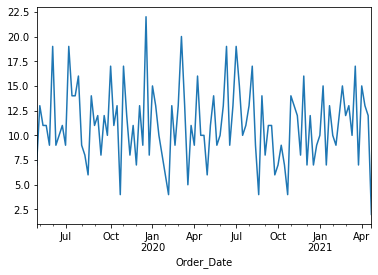

In [76]:
tipe1_count.plot()
plt.show()

In [77]:
tipe1_scale = scaler(tipe1_count, 0, 1)

In [87]:
x, y = gen_timelag(tipe1_scale, 4)

In [88]:
x = np.reshape(x, (x.shape[0], 4, 1))

In [89]:
x.shape

(101, 4, 1)

In [90]:
split = int(len(x)*0.8)
x_train = x[:split]
y_train = y[:split]
x_train.shape

(80, 4, 1)

In [91]:
x_val = x[split:]
y_val = y[split:]
x_val.shape

(21, 4, 1)

In [139]:
tf.keras.backend.clear_session()

In [140]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(16, input_shape=(4,1)),
    tf.keras.layers.Dense(1)
])

In [141]:
model.compile(optimizer='adam', loss='mse')

In [142]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 16)                912       
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [147]:
history = model.fit(x_train, y_train, epochs=200, validation_data=(x_val,y_val))

Epoch 1/200
3/3 [==============================] - 0s 18ms/step - loss: 0.0394 - val_loss: 0.0308
Epoch 2/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0395 - val_loss: 0.0310
Epoch 3/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0396 - val_loss: 0.0308
Epoch 4/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0395 - val_loss: 0.0308
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0394 - val_loss: 0.0305
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0394 - val_loss: 0.0300
Epoch 7/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0395 - val_loss: 0.0299
Epoch 8/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0395 - val_loss: 0.0299
Epoch 9/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0395 - val_loss: 0.0301
Epoch 10/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0394 - val_loss: 0.0301
Epoch 11/200
3/3 [==========

In [148]:
pred = scaler(model.predict(x_train), min(tipe1_count), max(tipe1_count))

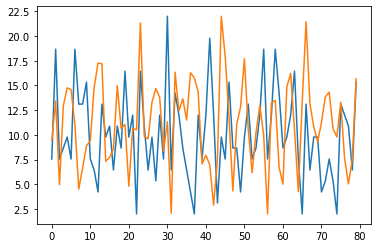

In [149]:
plt.plot(scaler(y_train, min(tipe1_count), max(tipe1_count)))
plt.plot(pred)
plt.show()

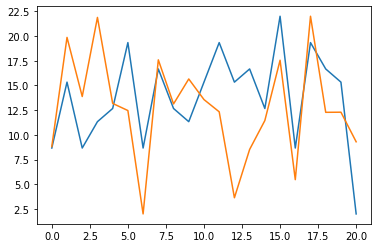

In [150]:
plt.plot(scaler(y_val, min(tipe1_count), max(tipe1_count)))
plt.plot(scaler(model.predict(x_val), min(tipe1_count), max(tipe1_count)))
plt.show()

In [169]:
np.mean(scaler(y_val, min(tipe1_count), max(tipe1_count))-np.reshape(scaler(model.predict(x_val), min(tipe1_count), max(tipe1_count)), (21,)))**(-0.5)

0.9806867096892488

# Model Tipe 2

In [171]:
tipe2 = df.copy()
tipe2 = tipe2[tipe2['Order']=='Tipe2']

In [172]:
tipe2['Order_Date'] = tipe2.Order_Date.dt.to_period('W').dt.to_timestamp()

In [173]:
tipe2_count = tipe2.groupby('Order_Date')['Order'].count()
tipe2_count.head()

Order_Date
2019-04-29    8
2019-05-06    4
2019-05-13    8
2019-05-20    3
2019-05-27    7
Name: Order, dtype: int64

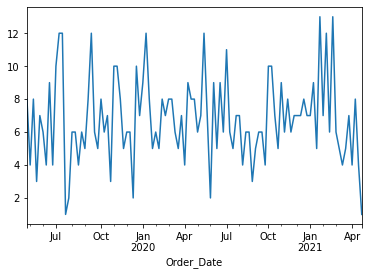

In [174]:
tipe2_count.plot()
plt.show()

In [175]:
tipe2_scale = scaler(tipe2_count, 0, 1)

In [176]:
x, y = gen_timelag(tipe2_scale, 4)

In [177]:
x = np.reshape(x, (x.shape[0], 4, 1))

In [178]:
x.shape

(101, 4, 1)

In [179]:
split = int(len(x)*0.8)
x_train = x[:split]
y_train = y[:split]
x_train.shape

(80, 4, 1)

In [180]:
x_val = x[split:]
y_val = y[split:]
x_val.shape

(21, 4, 1)

In [235]:
tf.keras.backend.clear_session()

In [236]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(16, input_shape=(4,1)),
    tf.keras.layers.Dense(1)
])

In [237]:
model.compile(optimizer='adam', loss='mse')

In [238]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 16)                1152      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [239]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val,y_val), verbose=0)

In [240]:
pred = scaler(model.predict(x_train), min(tipe2_count), max(tipe2_count))

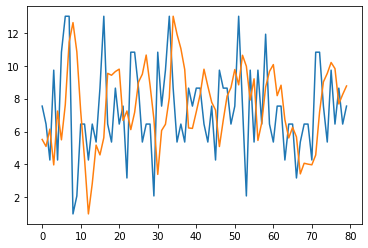

In [241]:
plt.plot(scaler(y_train, min(tipe2_count), max(tipe2_count)))
plt.plot(pred)
plt.show()

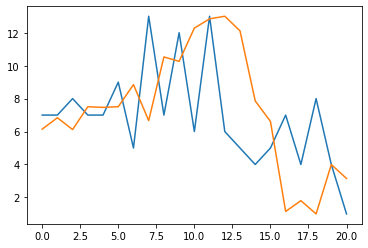

In [242]:
plt.plot(scaler(y_val, min(tipe2_count), max(tipe2_count)))
plt.plot(scaler(model.predict(x_val), min(tipe2_count), max(tipe2_count)))
plt.show()